# <center> </center>
# <center> 7a. VAR Simulation
## <center> ECO374

If using Colab, mount Google Drive and set path to files

In [1]:
import os
IN_COLAB = 'COLAB_GPU' in os.environ  
if IN_COLAB:
  from google.colab import drive; mount_path = '/content/drive'
  not os.path.ismount(mount_path) and drive.mount(mount_path)
  os.chdir('/content/drive/MyDrive/Colab Notebooks/Python_code') # Set Python file directory 

Set up R for Python

In [2]:
import R_for_Python_setup as RPY
RPY.setup_R()
ro, pandas2ri, StrVector = RPY.initialize_rpy2()
%load_ext rpy2.ipython

R installed
Operating system: Windows
Development tool: Anaconda


Load R packages

In [3]:
R_packages = ['forecast', 'tsDyn']
RPY.load_R_packages(R_packages)

R packages loaded: forecast, tsDyn


Load Python packages

In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.dates as mdates

# 1. Simulation
Simulate draws from a VAR process

In [5]:
%%R
base::set.seed(234234)

B1 <- matrix( c(0.7, 0.2, 
                0.2, 0.7), 2)

var1 <- data.frame(tsDyn::VAR.sim(B=B1, n=200, include="none"))

In [6]:
var1 = ro.globalenv['var1'] # copy data from R to Python
var1 = pandas2ri.rpy2py(var1)

Plot the draws

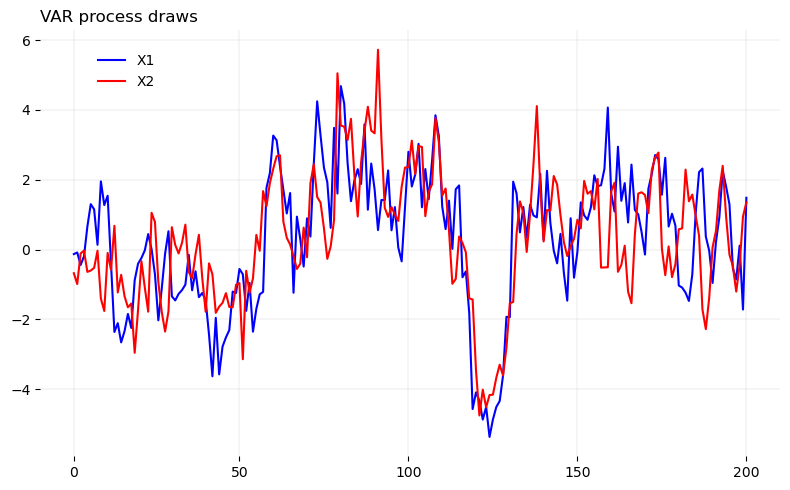

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(var1.index, var1['X1'], label='X1', color='blue', linestyle='-')
plt.plot(var1.index, var1['X2'], label='X2', color='red', linestyle='-')
plt.xticks([0, 49, 99, 149, 199], labels=['0', '50', '100', '150', '200'])
plt.xlabel('')
plt.ylabel('')
plt.title('VAR process draws', loc='left')
plt.legend(loc=(0.07, 0.85), frameon=False)
plt.grid(which='major', color='lightgrey', linewidth=0.3)
plt.box(False)
plt.tight_layout()
plt.show()